# Importing libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Q1. Load the dataset into python environment

In [55]:
data=pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Q2. Make ‘PassengerId’ as the index column

In [56]:
data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Q3. Check the basic details of the dataset

In [57]:
data.shape

(891, 11)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [59]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [60]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Q4. Fill in all the missing values present in all the columns in the dataset

In [61]:
#checking datatype of each column
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [62]:
#checking for null values 
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [63]:
#filling missing values in 'cabin' and 'Embrked' column using mode
for i in ['Cabin','Embarked']:
    data[i]=data[i].fillna(data[i].mode()[0])
#filling missing values in 'Age' column using median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [64]:
#checking for null values again
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Q5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of Age')

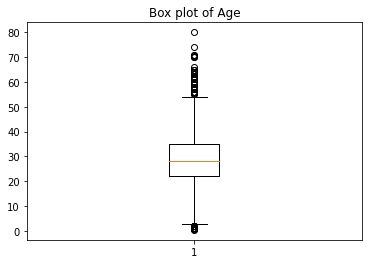

In [65]:
#Box plot of Age
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [66]:
#Finding IQR,lower limit and upper limit
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
#checking for outlier value
outlier=[]
for x in data['Age']:
    if ((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 22.0
Q2= 28.0
Q3= 35.0
IQR= 13.0
low_lim= 2.5
up_lim= 54.5


In [67]:
ind1=data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe602318df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe602386550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe602318a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe602386c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe602391040>],
 'means': []}

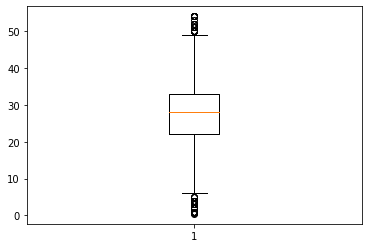

In [68]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)
plt.boxplot(data['Age'])

Text(0.5, 1.0, 'Box plot of Fare')

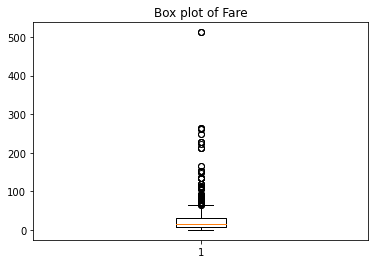

In [69]:
#Box plot of Fare
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [70]:
#Finding IQR,lower limit and upper limit
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
#checking for outlier value
outlier=[]
for x in data['Fare']:
    if ((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 7.8958
Q2= 14.1083
Q3= 30.5
IQR= 22.6042
low_lim= -26.0105
up_lim= 64.4063


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe60250e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe60250ea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe602501f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe602519160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe6025194f0>],
 'means': []}

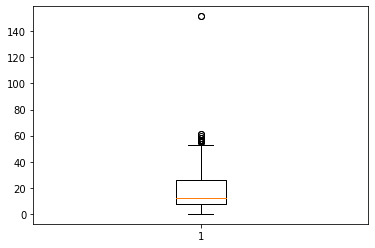

In [71]:
ind1=data['Fare']>up_lim
data.loc[ind1].index
data.drop([2, 28, 32, 35, 53, 62, 63, 73, 89, 98, 103, 119, 121, 125, 140, 152, 160, 181, 202, 216, 219, 225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 300, 307, 308, 311, 312, 319, 320, 325, 326, 333, 335, 337, 338, 342, 370, 374, 376, 378, 381, 386, 391, 394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 521, 528, 538, 541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace=True)
plt.boxplot(data['Fare'])

Text(0.5, 1.0, 'Box plot of SibSp')

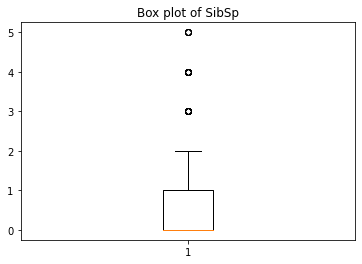

In [72]:
#Box plot of SibSp
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [73]:
#Finding IQR,lower limit and upper limit
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
print("Q1=",Q1)
print("Q2=",Q2)
print("Q3=",Q3)
print("IQR=",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("low_lim=",low_lim)
print("up_lim=",up_lim)
#checking for outlier value
outlier=[]
for x in data['SibSp']:
    if ((x<low_lim)or (x>up_lim)):
        outlier.append(x)

Q1= 0.0
Q2= 0.0
Q3= 1.0
IQR= 1.0
low_lim= -1.5
up_lim= 2.5


In [74]:
ind1=data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [75]:
data.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

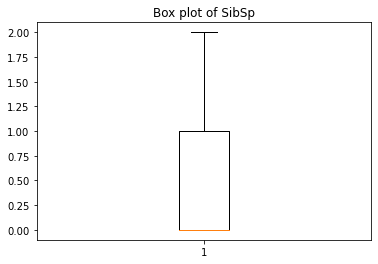

In [76]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

# Q6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [77]:
y = data['Survived']
#dropping all the object datatype columns
X=data.drop('Survived',axis=1)
X = X.drop('Name',axis=1)
X = X.drop('Sex',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)
X = X.drop('Embarked',axis=1)
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
6,3,28.0,0,0,8.4583
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,28.0,1,2,23.4500


In [78]:
#min_max scaling
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X

,0,1,2,3,4
0,1.0,0.402762,0.5,0.000000,0.047839
1,1.0,0.477417,0.0,0.000000,0.052293
2,0.0,0.645390,0.5,0.000000,0.350379
3,1.0,0.645390,0.0,0.000000,0.053118
4,1.0,0.514744,0.0,0.000000,0.055812
...,...,...,...,...,...
701,0.5,0.496081,0.0,0.000000,0.085780
702,0.0,0.346771,0.0,0.000000,0.197954
703,1.0,0.514744,0.5,0.333333,0.154734
704,0.0,0.477417,0.0,0.000000,0.197954


In [79]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.21984630580937253
R squared value is: 0.017513096112547144


In [ ]:
#MSE is high and R squared value is low